In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer         
from sklearn.base import BaseEstimator, TransformerMixin 

In [37]:
import pandas as pd
housing= pd.read_csv("housing.csv")

In [29]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [34]:
housing.hist(bins=30, figsize=(100, 100))

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

In [83]:
train_set = housing.sample(frac=0.8, random_state=42)
test_set = housing.drop(train_set.index)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat,rooms_per_household,bedrooms_per_room,population_per_household
20046,-119.01,36.06,25.0,1505.0,435.0,1392.0,359.0,1.6812,47700.0,INLAND,2,4.192201,NaN,3.877437
3024,-119.46,35.14,30.0,2943.0,435.0,1565.0,584.0,2.5313,45800.0,INLAND,2,5.039384,NaN,2.679795
15663,-122.44,37.80,52.0,3830.0,435.0,1310.0,963.0,3.4801,500001.0,NEAR BAY,3,3.977155,NaN,1.360332
20484,-118.72,34.28,17.0,3051.0,435.0,1705.0,495.0,5.7376,218600.0,<1H OCEAN,4,6.163636,NaN,3.444444
9814,-121.93,36.62,34.0,2351.0,435.0,1063.0,428.0,3.7250,278000.0,NEAR OCEAN,3,5.492991,NaN,2.483645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20011,-119.12,36.05,27.0,1575.0,321.0,1063.0,317.0,2.1477,53900.0,INLAND,2,4.968454,0.203810,3.353312
12225,-116.90,33.65,15.0,652.0,149.0,248.0,97.0,2.1071,93800.0,INLAND,2,6.721649,0.228528,2.556701
1051,-120.71,38.34,16.0,1257.0,231.0,559.0,213.0,4.4531,144300.0,INLAND,3,5.901408,0.183771,2.624413
14519,-117.13,32.91,16.0,2715.0,581.0,1619.0,584.0,4.0000,154700.0,<1H OCEAN,3,4.648973,0.213996,2.772260


In [97]:
housing['income_cat'] = pd.cut(housing['median_income'],
                          bins=[0., 1.5, 3.0, 4.5, 6.0, float('inf')],
                          labels=[1,2,3,4,5])
housing['income_cat']

0        5
1        5
2        5
3        4
4        3
        ..
20635    2
20636    2
20637    2
20638    2
20639    2
Name: income_cat, Length: 20640, dtype: category
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [122]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, test_idx in split.split(housing, housing['income_cat']):
    strat_train = housing.loc[train_idx]
    strat_test = housing.loc[test_idx]
split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [99]:
#4. Creating a Test Set
#a) Random Train-Test Split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

# b) Stratified Sampling (on income)
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0,1.5,3.0,4.5,6,np.inf],
    labels=[1,2,3,4,5]
)
pd.DataFrame(housing["income_cat"])

,income_cat
0,5
1,5
2,5
3,4
4,3
...,...
20635,2
20636,2
20637,2
20638,2


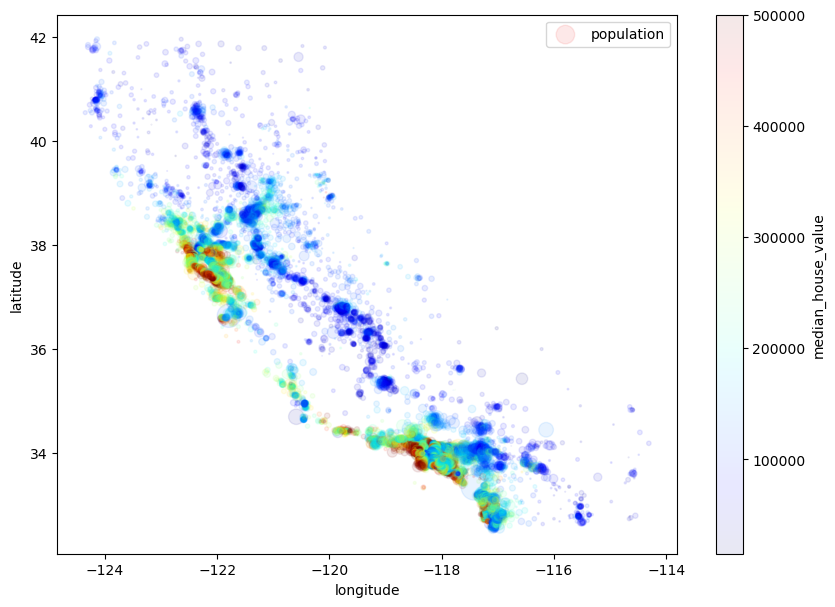

In [131]:
#5. Geographical Features & Visualization Geographical Features,longitude,latitude
housing.plot(kind="scatter", x="longitude", y="latitude",
             alpha=0.09,
             s=housing["population"]/100,
             label="population",
             figsize=(10,7),
             c="median_house_value",
             cmap=plt.get_cmap("jet"),
             colorbar=True)
plt.legend()
plt.show()

In [41]:
# Corelation with housing price
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

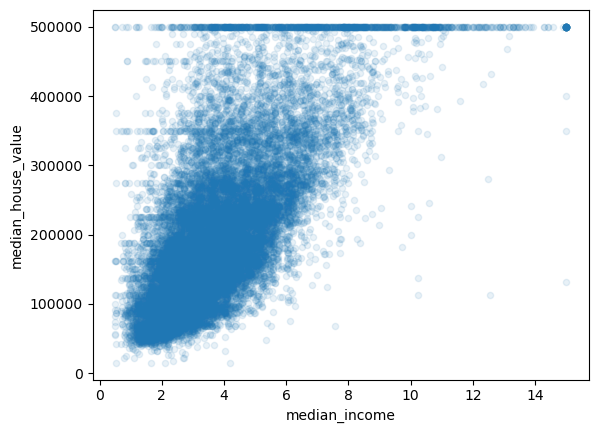

In [50]:
#scatter plot
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()

In [53]:
# 7. Feature Combination to Improve Correlation
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]
housing.corr(numeric_only=True)["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [95]:
#8 Is there any categorical data that needs to be converted to numerical? If so explain the 
# method used to convert and code the same and show the output.
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# select categorical columns
cat_cols = housing.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_array = ohe.fit_transform(housing[cat_cols])
encoded_cols = ohe.get_feature_names_out(cat_cols)
encoded_housing = pd.DataFrame(
    encoded_array,
    columns=encoded_cols,
    index=housing.index
)
housing_ohe = pd.concat(
    [housing.drop(cat_cols, axis=1), encoded_housing],
    axis=1
)
housing_ohe

Categorical columns: Index(['ocean_proximity'], dtype='object')


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,5,6.984127,0.146591,2.555556,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,5,6.238137,0.155797,2.109842,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,5,8.288136,0.129516,2.802260,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4,5.817352,0.184458,2.547945,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3,6.281853,0.172096,2.181467,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,2,5.045455,0.224625,2.560606,1.0,0.0,0.0,0.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,2,6.114035,0.215208,3.122807,1.0,0.0,0.0,0.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,2,5.205543,0.215173,2.325635,1.0,0.0,0.0,0.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,2,5.329513,0.219892,2.123209,1.0,0.0,0.0,0.0


In [73]:
# 9. Categorical Encoding Categorical Columnocean_proximity
housing["ocean_proximity"].value_counts()

#One-Hot Encoding
encoder = OneHotEncoder()
housing_cat_encoded = encoder.fit_transform(housing[["ocean_proximity"]])
encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [85]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:,3] / X[:,6]
        population_per_household = X[:,5] / X[:,6]
        return np.c_[X, rooms_per_household, population_per_household]